## Importing Packages ##

In [1]:
# Import packages from Python standard library
import numpy as np
import pandas as pd
import re
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from shapely import wkt
import geopandas as gpd
import geodatasets
import ast
import folium

## Loading Datasets & Cleaning ##

In [2]:
#Reading in clean Internet Demographics dataset 
clean_internet_demographics = pd.read_csv('../data/clean/internet_demographics.csv')
clean_internet_demographics.head(2)

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),Total Surveyed Computer Ownership,Std. Error: Total Surveyed Computer Ownership,total: has a computer,std. error: total: has a computer,total: no computer,std. error: total: no computer,...,std. error: total: satellite internet service,total: satellite internet service satellite internet service with no other type of internet subscription,std. error: total: satellite internet service satellite internet service with no other type of internet subscription,total: other service with no other type of internet subscription,std. error: total: other service with no other type of internet subscription,total: internet access without a subscription,std. error: total: internet access without a subscription,total: no internet access,std. error: total: no internet access,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,1617,113.9394,1476,125.4545,141,54.54546,...,23.63636,0,7.272727,0,7.272727,129,61.21212,184,57.57576,"POLYGON ((-87.720963 41.683952, -87.720304 41...."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,2634,176.9697,2075,133.9394,559,134.54550,...,59.39394,10,7.272727,0,10.303030,117,62.42424,634,127.27270,MULTIPOLYGON (((-87.72003618903081 41.68396731...


**The way in which the raw data file was compiled into the clean data file makes it confusing to understand the census data (numbers don't seem to add up correctly), so I am going to read in the raw data and only pull out the 'total' columns.**

In [3]:
#Reading in raw Internet Demographics Census Dataset
full_raw_internet_demographics = pd.read_csv('../../can-summer-2023/data/raw/demographics/R13395758_SL140.csv')
raw_internet_demographics = full_raw_internet_demographics[['FIPS','Qualifying Name',
'Total: With An Internet Subscription',
'Total: With An Internet Subscription Dial-Up With No Other Type Of Internet Subscription',
'Total: With An Internet Subscription Broadband Of Any Type',
'Total: With An Internet Subscription Cellular Data Plan',
'Total: With An Internet Subscription Cellular Data Plan Cellular Data Plan With No Other Type Of Internet Subscription',
'Total:  Broadband Such As Cable Fiber Optic Or Dsl',
'Total:  Broadband Such As Cable Fiber Optic Or Dsl Broadband Such As Cable Fiber Optic Or Dsl With No Other Type Of Internet Subscription',
'Total:  Satellite Internet Service',
'Total:  Satellite Internet Service Satellite Internet Service With No Other Type Of Internet Subscription',
'Total:  Other Service With No Other Type Of Internet Subscription',
'Total: Internet Access Without A Subscription',
'Total: No Internet Access',
'Total: Has A Computer',
'Total: Has A Computer: With Dial-Up Internet Subscription Alone',
'Total: Has A Computer: With A Broadband Internet Subscription',
'Total: Has A Computer: Without An Internet Subscription',
'Total: No Computer',
'Total',
'Total: With An Internet Subscription Dial-Up Alone',
'Total: With An Internet Subscription Broadband Such As Cable Fiber Optic Or Dsl',
'Total: With An Internet Subscription Satellite Internet Service',
'Total: With An Internet Subscription Other Service',]]

raw_internet_demographics.head(3)

,FIPS,Qualifying Name,Total: With An Internet Subscription,Total: With An Internet Subscription Dial-Up With No Other Type Of Internet Subscription,Total: With An Internet Subscription Broadband Of Any Type,Total: With An Internet Subscription Cellular Data Plan,Total: With An Internet Subscription Cellular Data Plan Cellular Data Plan With No Other Type Of Internet Subscription,Total: Broadband Such As Cable Fiber Optic Or Dsl,Total: Broadband Such As Cable Fiber Optic Or Dsl Broadband Such As Cable Fiber Optic Or Dsl With No Other Type Of Internet Subscription,Total: Satellite Internet Service,...,Total: Has A Computer,Total: Has A Computer: With Dial-Up Internet Subscription Alone,Total: Has A Computer: With A Broadband Internet Subscription,Total: Has A Computer: Without An Internet Subscription,Total: No Computer,Total,Total: With An Internet Subscription Dial-Up Alone,Total: With An Internet Subscription Broadband Such As Cable Fiber Optic Or Dsl,Total: With An Internet Subscription Satellite Internet Service,Total: With An Internet Subscription Other Service
0,Geo_FIPS,Geo_QName,ACS21_5yr_B28002002,ACS21_5yr_B28002003,ACS21_5yr_B28002004,ACS21_5yr_B28002005,ACS21_5yr_B28002006,ACS21_5yr_B28002007,ACS21_5yr_B28002008,ACS21_5yr_B28002009,...,ACS21_5yr_B28003002,ACS21_5yr_B28003003,ACS21_5yr_B28003004,ACS21_5yr_B28003005,ACS21_5yr_B28003006,ACS21_5yr_B28002001,ACS21_5yr_B28011003,ACS21_5yr_B28011004,ACS21_5yr_B28011005,ACS21_5yr_B28011006
1,17031010100,"Census Tract 101, Cook County, Illinois",1952,17,1935,1761,225,1710,174,62,...,2112,17,1870,225,299,2411,17,1710,62,0
2,17031010201,"Census Tract 102.01, Cook County, Illinois",2543,0,2543,2231,266,2234,312,128,...,2726,0,2468,258,270,2996,0,2234,128,31


In the raw_internet_demographics dataset that I made, it does not include the 'geometry' column that is in the clean_internet_demographics dataset. So, I need to merge the 'geometry' column into the raw_internet_demographics. So, I must first rename the 'Qualifying Name' column to 'qualifying name' so that the merge will work. I am also going to change the column name 'FIPS' to 'geoid', because the clean_internet_demographics dataset calls it 'geiod'.

In [4]:
#Renaming 'Qualifying Name' to 'qualifying name' so that I can merge the geometry column into the raw_internet_demographics from clean_internet_demographics
raw_internet_demographics_rename = raw_internet_demographics.rename(columns={'Qualifying Name': 'qualifying name','FIPS':'geoid'})

#Dropping first row that contains unnecessary descriptions
raw_internet_demographics_drop = raw_internet_demographics_rename.drop(labels=0,axis=0)
raw_internet_demographics_drop.head(2)

,geoid,qualifying name,Total: With An Internet Subscription,Total: With An Internet Subscription Dial-Up With No Other Type Of Internet Subscription,Total: With An Internet Subscription Broadband Of Any Type,Total: With An Internet Subscription Cellular Data Plan,Total: With An Internet Subscription Cellular Data Plan Cellular Data Plan With No Other Type Of Internet Subscription,Total: Broadband Such As Cable Fiber Optic Or Dsl,Total: Broadband Such As Cable Fiber Optic Or Dsl Broadband Such As Cable Fiber Optic Or Dsl With No Other Type Of Internet Subscription,Total: Satellite Internet Service,...,Total: Has A Computer,Total: Has A Computer: With Dial-Up Internet Subscription Alone,Total: Has A Computer: With A Broadband Internet Subscription,Total: Has A Computer: Without An Internet Subscription,Total: No Computer,Total,Total: With An Internet Subscription Dial-Up Alone,Total: With An Internet Subscription Broadband Such As Cable Fiber Optic Or Dsl,Total: With An Internet Subscription Satellite Internet Service,Total: With An Internet Subscription Other Service
1,17031010100,"Census Tract 101, Cook County, Illinois",1952,17,1935,1761,225,1710,174,62,...,2112,17,1870,225,299,2411,17,1710,62,0
2,17031010201,"Census Tract 102.01, Cook County, Illinois",2543,0,2543,2231,266,2234,312,128,...,2726,0,2468,258,270,2996,0,2234,128,31


In [5]:
#Merging: to ensure that the geometry matches the correct census tracts, I merge using the 'qualifying name' column
to_merge = clean_internet_demographics[['qualifying name','geometry']]
to_merge.head()

,qualifying name,geometry
0,"Census Tract 8233.03, Cook County, Illinois","POLYGON ((-87.720963 41.683952, -87.720304 41...."
1,"Census Tract 8233.04, Cook County, Illinois",MULTIPOLYGON (((-87.72003618903081 41.68396731...
2,"Census Tract 7404, Cook County, Illinois","POLYGON ((-87.72008 41.691274, -87.719372 41.6..."
3,"Census Tract 7403, Cook County, Illinois","POLYGON ((-87.720431 41.698569, -87.720066 41...."
4,"Census Tract 8228.02, Cook County, Illinois","MULTIPOLYGON (((-87.720752 41.702042, -87.7207..."


In [56]:
#Merging the geometry column into the raw_internet_demographics_rename and renaming it
raw_internet_demo = raw_internet_demographics_drop.merge(to_merge, on='qualifying name')
raw_internet_demo.head(2)

,geoid,qualifying name,Total: With An Internet Subscription,Total: With An Internet Subscription Dial-Up With No Other Type Of Internet Subscription,Total: With An Internet Subscription Broadband Of Any Type,Total: With An Internet Subscription Cellular Data Plan,Total: With An Internet Subscription Cellular Data Plan Cellular Data Plan With No Other Type Of Internet Subscription,Total: Broadband Such As Cable Fiber Optic Or Dsl,Total: Broadband Such As Cable Fiber Optic Or Dsl Broadband Such As Cable Fiber Optic Or Dsl With No Other Type Of Internet Subscription,Total: Satellite Internet Service,...,Total: Has A Computer: With Dial-Up Internet Subscription Alone,Total: Has A Computer: With A Broadband Internet Subscription,Total: Has A Computer: Without An Internet Subscription,Total: No Computer,Total,Total: With An Internet Subscription Dial-Up Alone,Total: With An Internet Subscription Broadband Such As Cable Fiber Optic Or Dsl,Total: With An Internet Subscription Satellite Internet Service,Total: With An Internet Subscription Other Service,geometry
0,17031010100,"Census Tract 101, Cook County, Illinois",1952,17,1935,1761,225,1710,174,62,...,17,1870,225,299,2411,17,1710,62,0,"POLYGON ((-87.676277 42.022965, -87.675968 42...."
1,17031010201,"Census Tract 102.01, Cook County, Illinois",2543,0,2543,2231,266,2234,312,128,...,0,2468,258,270,2996,0,2234,128,31,"POLYGON ((-87.684317 42.019481, -87.683901 42...."


When trying to take a percentage (dividing one column over another), Python does not see it as division for each numerical value. So, I have to convert the list of numbers in every column to be considered integers that can be divided.

In [57]:
#Convert list of numbers to integers
for i in range(2,23):
    
    raw_internet_demo.iloc[:, i] = pd.to_numeric(raw_internet_demo.iloc[:, i])

raw_internet_demo.head(2)

,geoid,qualifying name,Total: With An Internet Subscription,Total: With An Internet Subscription Dial-Up With No Other Type Of Internet Subscription,Total: With An Internet Subscription Broadband Of Any Type,Total: With An Internet Subscription Cellular Data Plan,Total: With An Internet Subscription Cellular Data Plan Cellular Data Plan With No Other Type Of Internet Subscription,Total: Broadband Such As Cable Fiber Optic Or Dsl,Total: Broadband Such As Cable Fiber Optic Or Dsl Broadband Such As Cable Fiber Optic Or Dsl With No Other Type Of Internet Subscription,Total: Satellite Internet Service,...,Total: Has A Computer: With Dial-Up Internet Subscription Alone,Total: Has A Computer: With A Broadband Internet Subscription,Total: Has A Computer: Without An Internet Subscription,Total: No Computer,Total,Total: With An Internet Subscription Dial-Up Alone,Total: With An Internet Subscription Broadband Such As Cable Fiber Optic Or Dsl,Total: With An Internet Subscription Satellite Internet Service,Total: With An Internet Subscription Other Service,geometry
0,17031010100,"Census Tract 101, Cook County, Illinois",1952,17,1935,1761,225,1710,174,62,...,17,1870,225,299,2411,17,1710,62,0,"POLYGON ((-87.676277 42.022965, -87.675968 42...."
1,17031010201,"Census Tract 102.01, Cook County, Illinois",2543,0,2543,2231,266,2234,312,128,...,0,2468,258,270,2996,0,2234,128,31,"POLYGON ((-87.684317 42.019481, -87.683901 42...."


In [39]:
raw_internet_demo['Total: Has A Computer: Without An Internet Subscription'].dtype

dtype('O')

In [44]:
raw_internet_demo.loc[0,'Total: Has A Computer: With A Broadband Internet Subscription'].dtype

AttributeError: 'int' object has no attribute 'dtype'

In [8]:
#Removing census tracts that have 0's across all columns and replacing them with NaN so that percentages can still be calculated without = 0
raw_internet_demos_all = raw_internet_demo.replace(0, np.nan)
raw_internet_demos_all.head(2)

,geoid,qualifying name,Total: With An Internet Subscription,Total: With An Internet Subscription Dial-Up With No Other Type Of Internet Subscription,Total: With An Internet Subscription Broadband Of Any Type,Total: With An Internet Subscription Cellular Data Plan,Total: With An Internet Subscription Cellular Data Plan Cellular Data Plan With No Other Type Of Internet Subscription,Total: Broadband Such As Cable Fiber Optic Or Dsl,Total: Broadband Such As Cable Fiber Optic Or Dsl Broadband Such As Cable Fiber Optic Or Dsl With No Other Type Of Internet Subscription,Total: Satellite Internet Service,...,Total: Has A Computer: With Dial-Up Internet Subscription Alone,Total: Has A Computer: With A Broadband Internet Subscription,Total: Has A Computer: Without An Internet Subscription,Total: No Computer,Total,Total: With An Internet Subscription Dial-Up Alone,Total: With An Internet Subscription Broadband Such As Cable Fiber Optic Or Dsl,Total: With An Internet Subscription Satellite Internet Service,Total: With An Internet Subscription Other Service,geometry
0,17031010100,"Census Tract 101, Cook County, Illinois",1952.0,17.0,1935.0,1761.0,225.0,1710.0,174.0,62.0,...,17.0,1870.0,225.0,299.0,2411.0,17.0,1710.0,62.0,0,"POLYGON ((-87.676277 42.022965, -87.675968 42...."
1,17031010201,"Census Tract 102.01, Cook County, Illinois",2543.0,NaN,2543.0,2231.0,266.0,2234.0,312.0,128.0,...,NaN,2468.0,258.0,270.0,2996.0,NaN,2234.0,128.0,31,"POLYGON ((-87.684317 42.019481, -87.683901 42...."


## Heatmaps ##

### Percent of People with Internet Access ###

In [9]:
#Adding Column that calculates (Total) - (No Internet Access)/(Total)
raw_internet_demos_all['Percentage of People with Internet Access'] = ((raw_internet_demos_all['Total'] - (raw_internet_demos_all['Total: No Internet Access']))/ (raw_internet_demos_all['Total']))
raw_internet_demos_all.head()


,geoid,qualifying name,Total: With An Internet Subscription,Total: With An Internet Subscription Dial-Up With No Other Type Of Internet Subscription,Total: With An Internet Subscription Broadband Of Any Type,Total: With An Internet Subscription Cellular Data Plan,Total: With An Internet Subscription Cellular Data Plan Cellular Data Plan With No Other Type Of Internet Subscription,Total: Broadband Such As Cable Fiber Optic Or Dsl,Total: Broadband Such As Cable Fiber Optic Or Dsl Broadband Such As Cable Fiber Optic Or Dsl With No Other Type Of Internet Subscription,Total: Satellite Internet Service,...,Total: Has A Computer: With A Broadband Internet Subscription,Total: Has A Computer: Without An Internet Subscription,Total: No Computer,Total,Total: With An Internet Subscription Dial-Up Alone,Total: With An Internet Subscription Broadband Such As Cable Fiber Optic Or Dsl,Total: With An Internet Subscription Satellite Internet Service,Total: With An Internet Subscription Other Service,geometry,Percentage of People with Internet Access
0,17031010100,"Census Tract 101, Cook County, Illinois",1952.0,17.0,1935.0,1761.0,225.0,1710.0,174.0,62.0,...,1870.0,225.0,299.0,2411.0,17.0,1710.0,62.0,0,"POLYGON ((-87.676277 42.022965, -87.675968 42....",0.846951
1,17031010201,"Census Tract 102.01, Cook County, Illinois",2543.0,NaN,2543.0,2231.0,266.0,2234.0,312.0,128.0,...,2468.0,258.0,270.0,2996.0,NaN,2234.0,128.0,31,"POLYGON ((-87.684317 42.019481, -87.683901 42....",0.903204
2,17031010202,"Census Tract 102.02, Cook County, Illinois",1040.0,NaN,1040.0,862.0,151.0,852.0,161.0,56.0,...,1022.0,137.0,75.0,1234.0,NaN,852.0,56.0,0,"POLYGON ((-87.676745 42.01941, -87.67651175102...",0.890600
3,17031010300,"Census Tract 103, Cook County, Illinois",2548.0,NaN,2548.0,2320.0,352.0,2112.0,185.0,183.0,...,2508.0,327.0,160.0,2995.0,NaN,2112.0,183.0,100,"POLYGON ((-87.671212 42.019373, -87.670858 42....",0.877462
4,17031010400,"Census Tract 104, Cook County, Illinois",1487.0,NaN,1487.0,1423.0,216.0,1238.0,64.0,47.0,...,1487.0,187.0,360.0,2034.0,NaN,1238.0,47.0,0,"POLYGON ((-87.663213 42.012834, -87.662494 42....",0.779744


In [54]:
raw_internet_demos_all.loc[0,'Percentage of People with Internet Access'].dtype

dtype('float64')

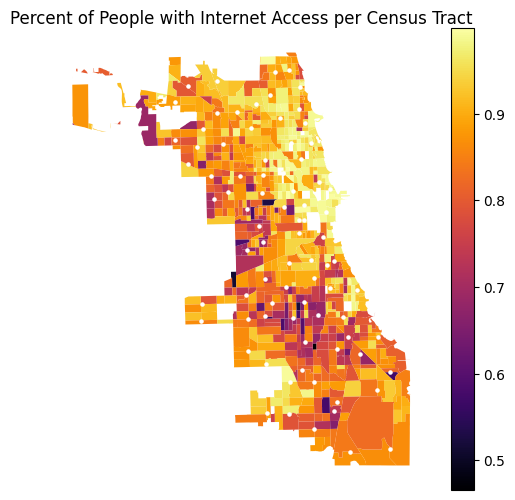

In [10]:
#Reading in clean branch data
branchLocsOnly = pd.read_csv('../data/clean/branches.csv')

# this line makes a copy of the raw_internet_demos_all data frame so we can manipulate without affecting our primary dataset
internet_access_percentage = raw_internet_demos_all.copy(deep = True)

# the following converts the data frame to a geo data frame and plots Percentage of People with Internet Access
internet_access_percentage = gpd.GeoDataFrame(
    internet_access_percentage.loc[:, [c for c in internet_access_percentage.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(internet_access_percentage["geometry"]),
    crs="epsg:4326",
    )

fig, ax = plt.subplots(1, figsize=(6, 6))
base = internet_access_percentage.plot(column='Percentage of People with Internet Access', legend=True, ax=ax, cmap='inferno')
ax.axis('off')
ax.set_title('Percent of People with Internet Access per Census Tract', fontdict={'fontsize': '12', 'fontweight' : '3'})

#Adding small white dots to represent library branch points
branchLocsOnly.crs = 'EPSG:4326'
branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
branchLocsOnly = branchLocsOnly.drop(columns='LOCATION')


branchLocsOnly = gpd.GeoDataFrame(
    branchLocsOnly, geometry=gpd.points_from_xy(branchLocsOnly.Longitude, branchLocsOnly.Latitude), crs="EPSG:4326")


branchLocsOnly.plot(ax=base, marker='o', color='white', markersize=5);

### Percent of People with Computers ###

In [16]:
#Adding Column that calculates: (Total) - (No Computer)/(Total) = Percentage of People with Computers
raw_internet_demos_all['Percentage of People with Computers'] = ((raw_internet_demos_all['Total'] - (raw_internet_demos_all['Total: No Computer']))/ (raw_internet_demos_all['Total']))
raw_internet_demos_all.head(2)

,geoid,qualifying name,Total: With An Internet Subscription,Total: With An Internet Subscription Dial-Up With No Other Type Of Internet Subscription,Total: With An Internet Subscription Broadband Of Any Type,Total: With An Internet Subscription Cellular Data Plan,Total: With An Internet Subscription Cellular Data Plan Cellular Data Plan With No Other Type Of Internet Subscription,Total: Broadband Such As Cable Fiber Optic Or Dsl,Total: Broadband Such As Cable Fiber Optic Or Dsl Broadband Such As Cable Fiber Optic Or Dsl With No Other Type Of Internet Subscription,Total: Satellite Internet Service,...,Total: Has A Computer: Without An Internet Subscription,Total: No Computer,Total,Total: With An Internet Subscription Dial-Up Alone,Total: With An Internet Subscription Broadband Such As Cable Fiber Optic Or Dsl,Total: With An Internet Subscription Satellite Internet Service,Total: With An Internet Subscription Other Service,Percentage of People with Internet Access,geometry,Percentage of People with Computers
0,17031010100,"Census Tract 101, Cook County, Illinois",1952.0,17.0,1935.0,1761.0,225.0,1710.0,174.0,62.0,...,225.0,299.0,2411.0,17.0,1710.0,62.0,0,0.846951,"POLYGON ((-87.67628 42.02296, -87.67597 42.022...",0.875985
1,17031010201,"Census Tract 102.01, Cook County, Illinois",2543.0,NaN,2543.0,2231.0,266.0,2234.0,312.0,128.0,...,258.0,270.0,2996.0,NaN,2234.0,128.0,31,0.903204,"POLYGON ((-87.68432 42.01948, -87.68390 42.019...",0.909880


In [17]:
#Reading in clean branch data
branchLocsOnly = pd.read_csv('../data/clean/branches.csv')

# this line makes a copy of the raw_internet_demos_all data frame so we can manipulate without affecting our primary dataset
computer_own_percentage = raw_internet_demos_all.copy(deep = True)

# the following converts the data frame to a geo data frame and plots Percentage of People with Computers
computer_own_percentage = gpd.GeoDataFrame(
    computer_own_percentage.loc[:, [c for c in computer_own_percentage.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(computer_own_percentage["geometry"]),
    crs="epsg:4326",
    )

fig, ax = plt.subplots(1, figsize=(6, 6))
computer_own_percentage.plot(column='Percentage of People with Computers', legend=True, ax=ax)
ax.axis('off')
ax.set_title('Percent of People with Computers', fontdict={'fontsize': '12', 'fontweight' : '3'})

#Adding small white dots to represent library branch points
branchLocsOnly.crs = 'EPSG:4326'
branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
branchLocsOnly = branchLocsOnly.drop(columns='LOCATION')


branchLocsOnly = gpd.GeoDataFrame(
    branchLocsOnly, geometry=gpd.points_from_xy(branchLocsOnly.Longitude, branchLocsOnly.Latitude), crs="EPSG:4326")
#print(branchLocsOnly.head())


branchLocsOnly.plot(ax=base, marker='o', color='white', markersize=5);

TypeError: Expected bytes or string, got Polygon

### Computer and Internet Access ###

In [58]:
#Replacing 0 values in total column with Nan
#raw_internet_demo['Total'] = raw_internet_demo['Total'].replace(0,np.nan)

#Adding Column that calculates: (Has Computer w Internet + Has Computer w Internet)/(Total) = Percent of people who have a computer with internet
raw_internet_demo['Percent of People with Computers and Internet'] = (((raw_internet_demo['Total: Has A Computer: With Dial-Up Internet Subscription Alone'] + raw_internet_demo['Total: Has A Computer: With A Broadband Internet Subscription']))/(raw_internet_demo['Total']))
                                                                        
raw_internet_demo.head(2)

ZeroDivisionError: division by zero

In [25]:
raw_internet_demo['Total']

0      2411.0
1      2996.0
2      1234.0
3      2995.0
4      2034.0
        ...  
864       NaN
865       NaN
866     937.0
867     956.0
868    2159.0
Name: Total, Length: 869, dtype: float64

In [48]:
raw_internet_demo.loc[0,'Percent of People with Computers and Internet'].dtype

AttributeError: 'float' object has no attribute 'dtype'

Text(0.5, 1.0, 'Percent of People with Computers and Internet')

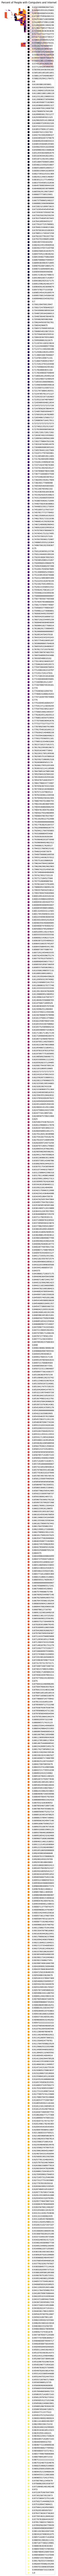

In [51]:
#Reading in clean branch data
branchLocsOnly = pd.read_csv('../data/clean/branches.csv')

# this line makes a copy of the raw_internet_demos_all data frame so we can manipulate without affecting our primary dataset
CandI_access_percentage = raw_internet_demo.copy(deep = True)

# the following converts the data frame to a geo data frame and plots Percentage of People with Internet Access
CandI_access_percentage = gpd.GeoDataFrame(
    CandI_access_percentage.loc[:, [c for c in CandI_access_percentage.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(CandI_access_percentage["geometry"]),
    crs="epsg:4326",
    )

fig, ax = plt.subplots(1, figsize=(6, 6))
base = CandI_access_percentage.plot(column='Percent of People with Computers and Internet',legend=True, ax=ax, cmap='inferno')
ax.axis('off')
ax.set_title('Percent of People with Computers and Internet', fontdict={'fontsize': '12', 'fontweight' : '3'})

#Adding small white dots to represent library branch points
#branchLocsOnly.crs = 'EPSG:4326'
#branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
#branchLocsOnly = branchLocsOnly.drop(columns='LOCATION')


#branchLocsOnly = gpd.GeoDataFrame(
#    branchLocsOnly, geometry=gpd.points_from_xy(branchLocsOnly.Longitude, branchLocsOnly.Latitude), crs="EPSG:4326")


#branchLocsOnly.plot(ax=base, marker='o', color='white', markersize=5);